**Predictive Sales and Inventory Optimization**

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# Load Dataset
df = pd.read_csv("/Fashion_Retail_Sales.csv")

In [3]:
# Satistical values oof Data
df.describe()

,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,2750.000000,3076.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,419.536669,1.156505
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.000000
50%,4040.000000,110.000000,3.000000
75%,4081.000000,155.750000,4.000000
max,4122.000000,4932.000000,5.000000


In [29]:
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Purchase Amount (USD)\t,Quantity
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card,4619.0,1
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,2456.0,1
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,2102.0,1
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,3126.0,1
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,3003.0,1


In [5]:
# Data Cleaning
# Changing date and time


df['Date Purchase'] = pd.to_datetime(df['Date Purchase'],dayfirst=True)

In [6]:
# Checking missing Values

df['Purchase Amount (USD)	'] = df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].median())
df['Quantity'] = 1

In [8]:
# Sales data Agression

daily_sales = df.groupby('Date Purchase')['Quantity'].sum().reset_index()
daily_sales.columns = ['Date','Sales']

In [9]:
# Creating Features(Day, Month, Year, Day of week)

daily_sales['Year'] = daily_sales['Date'].dt.year
daily_sales['Month'] = daily_sales['Date'].dt.month
daily_sales['Day'] = daily_sales['Date'].dt.day
daily_sales['Day_of_week'] = daily_sales['Date'].dt.dayofweek

In [10]:
# Machine Learning Model

X = daily_sales[['Year', 'Month','Day', 'Day_of_week']]
y = daily_sales['Sales']

In [11]:
# Seperating data (Train & Test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)


In [12]:
# Model Training

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [15]:
# Future prediction

Prediction = model.predict(X_test)
print(f"prediction Error(MAE):{mean_absolute_error(y_test,Prediction):.2f}")   # MAE(Mean Absolute Error)

prediction Error(MAE):2.98


In [16]:
# Inventory Optimization Logic
avg_daily_sales = daily_sales['Sales'].mean()
std_daily_sales = daily_sales['Sales'].std()

lead_time = 7
service_level = 1.65


In [18]:
safety_stock = service_level * std_daily_sales * np.sqrt(lead_time)
reorder_point =(avg_daily_sales * lead_time) + safety_stock

print("-" * 30)
print(f"Safety stock needed: {round(safety_stock)} units")
print(f"Reorder point: {round(reorder_point)} units")
print("-" * 30)

------------------------------
Safety stock needed: 13 units
Reorder point: 78 units
------------------------------


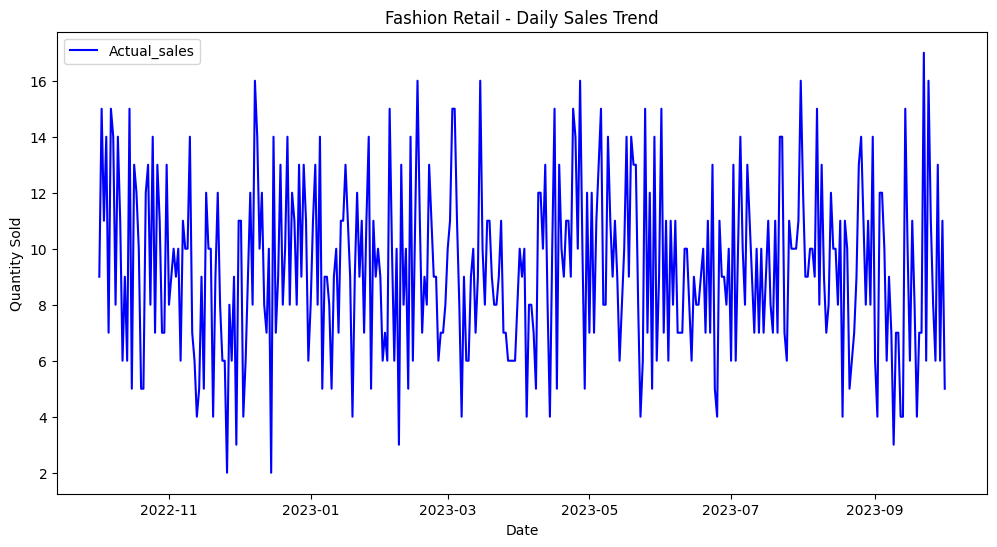

In [19]:
# Visulization

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'],label = 'Actual_sales', color = 'blue')
plt.title('Fashion Retail - Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()


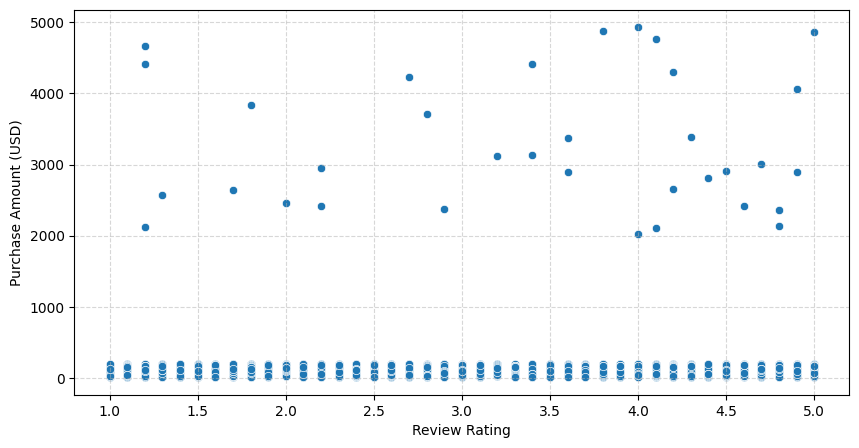

In [23]:
# Plot 1: Review rating vs Purchase amount

plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x='Review Rating', y = 'Purchase Amount (USD)')
plt.grid(True, linestyle = '--',alpha=0.5)
plt.show()

<Axes: xlabel='Date Purchase', ylabel='Purchase Amount (USD)'>

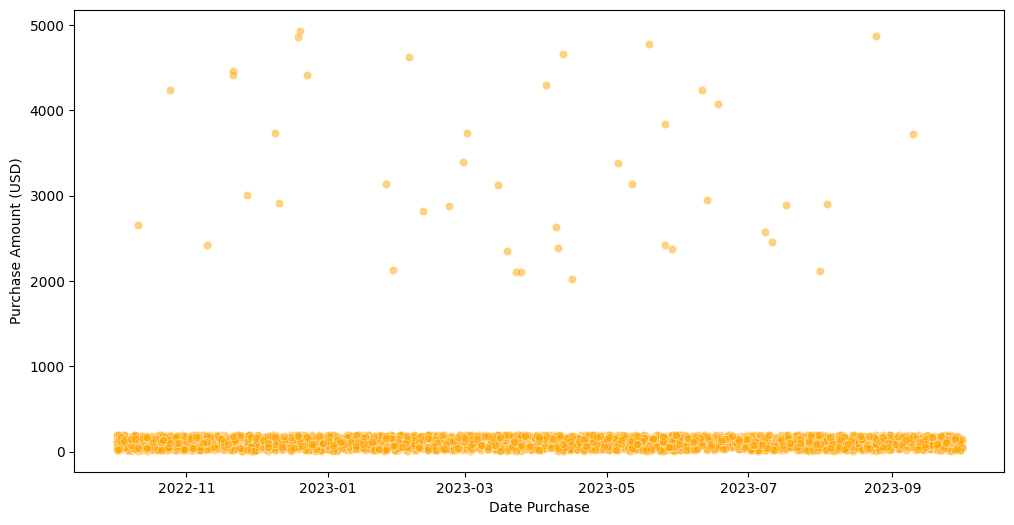

In [24]:
# Plot:2 Date vs purchase Amount

plt.figure(figsize =(12, 6))
sns.scatterplot(data = df, x = 'Date Purchase', y = 'Purchase Amount (USD)',alpha = 0.5, color = 'orange')

In [35]:
# Item wise stock analysis

top_items = df['Item Purchased'].value_counts().head(3).index.tolist()
print("--- Item-wise Inventory optimization ---")

for item in top_items:
  item_df = df[df['Item Purchased'] == item]


# Daily sales calculation for that items
item_daily = item_df.groupby('Date Purchase')['Quantity'].sum()
avg_sales = item_daily.mean()
std_sales = item_daily.std()

# ROP Calculation
item_safety_stock = 1.65 * std_sales * np.sqrt(7)
item_rop = (avg_sales * 7) + item_safety_stock

print(f" item: {item}")
print(f" Average Daily Sales: {avg_sales:.2f}")
print(f" Suggested Reorder Point(RAP): {round(item_rop)} units")
print("-" * 40)

--- Item-wise Inventory optimization ---
 item: Shorts
 Average Daily Sales: 1.12
 Suggested Reorder Point(RAP): 9 units
----------------------------------------
